# Simple Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import pandas_datareader

C:\Program Files\Anaconda3\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.1.0' currently installed).
  warnings.warn(msg, UserWarning)
C:\Program Files\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


## Importing the dataset

In [2]:
start_date = '2019-06-12'
end_date = '2020-06-12'

In [3]:
data = pandas_datareader.data.get_data_yahoo('^NSEI', start_date, end_date)
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-12,11962.450195,11866.349609,11962.450195,11906.200195,283700.0,11906.200195
2019-06-13,11931.349609,11817.049805,11873.900391,11914.049805,447900.0,11914.049805
2019-06-14,11911.849609,11797.700195,11910.099609,11823.299805,390300.0,11823.299805
2019-06-17,11844.049805,11657.750000,11844.000000,11672.150391,295500.0,11672.150391
2019-06-18,11727.200195,11641.150391,11677.049805,11691.500000,365500.0,11691.500000


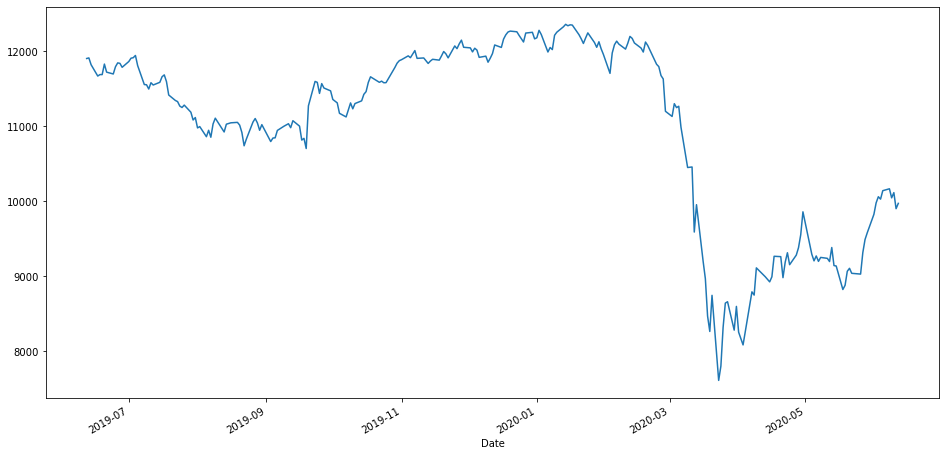

In [4]:
plt.figure(figsize=(16,8))
data['Close'].plot()
plt.show()

In [16]:
X=data[1:len(data)][['Adj Close']]
y=data[0:len(data)-1][['Adj Close']].rename(columns={'Adj Close': 'Close'})

In [17]:
print(y)

                   Close
Date                    
2019-06-12  11906.200195
2019-06-13  11914.049805
2019-06-14  11823.299805
2019-06-17  11672.150391
2019-06-18  11691.500000
...                  ...
2020-06-05  10142.150391
2020-06-08  10167.450195
2020-06-09  10046.650391
2020-06-10  10116.150391
2020-06-11   9902.000000

[244 rows x 1 columns]


## Splitting the dataset into the Training set and Test set

In [18]:
X_train = X.head(200)
y_train = y.head(200)
X_test = X.tail(44) 
y_test = y.tail(44)

## Training the Simple Linear Regression model on the Training set

In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting the Test set results

In [36]:
y_pred = regressor.predict(X_test)

## Visualising the Training set results

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


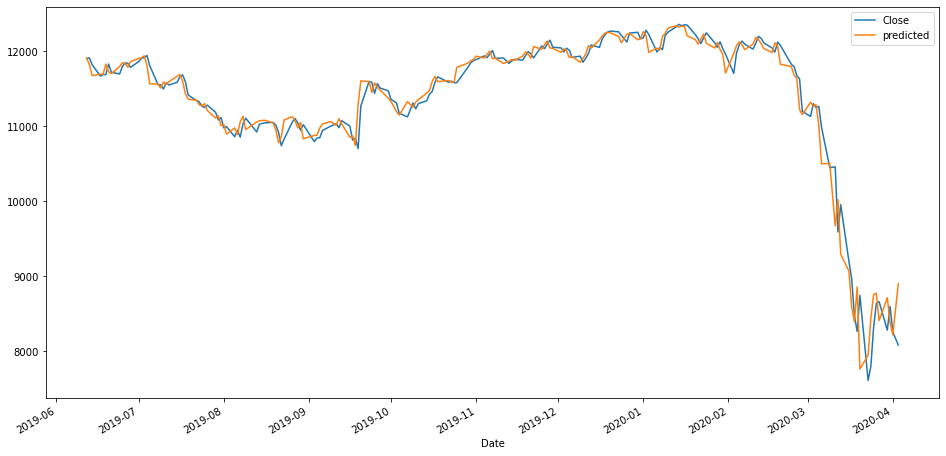

In [51]:
y_plt = y_train[:]
y_plt['predicted'] = np.array(regressor.predict(X_train))
plt.figure(figsize=(16,8))
y_train['Close'].plot()
y_plt['predicted'].plot()
plt.legend()

## Visualising the Test set results

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


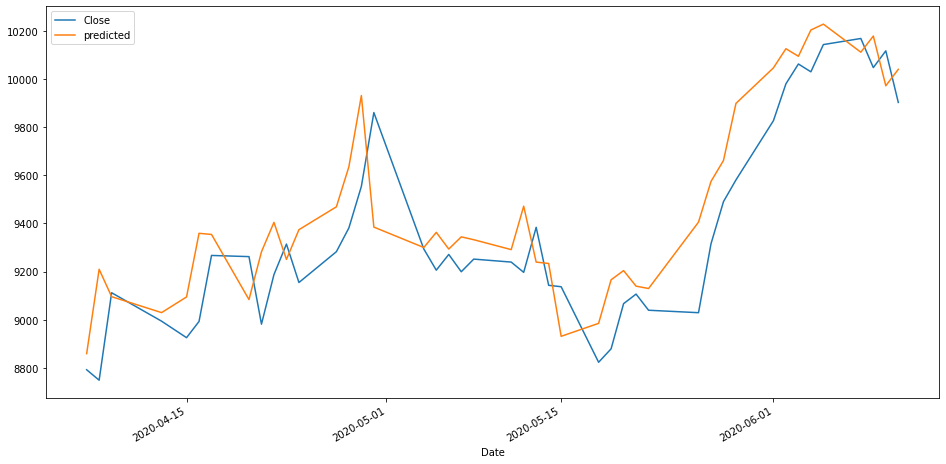

In [52]:
y_plt2 = y_test[:]
y_plt2['predicted'] = np.array(regressor.predict(X_test))
plt.figure(figsize=(16,8))
y_test['Close'].plot()
y_plt2['predicted'].plot()
plt.legend()

In [54]:
print(regressor.predict([[8800]]))

[[8908.57039372]]
